In [1]:
%matplotlib inline


# Plotting shots
 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

## Opening the dataset
lets take the same game example between germany and spain 
The event data, which we will mostly focus on,
 



In [8]:
parser = Sbopen()
df_event, related, freeze, tactics = parser.event(22949)
#get team names
team1, team2 = df_event.team_name.unique()
#A dataframe of shots


we need only the shots events for plotting the shots, so we will filter the df

In [9]:
shots = df_event.loc[df_event['type_name'] == 'Shot'].set_index('id')
shots.head()

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,foul_committed_advantage,dribble_overrun,ball_recovery_offensive,shot_open_goal,substitution_replacement_id,substitution_replacement_name,block_deflection,foul_committed_card_id,foul_committed_card_name,shot_one_on_one
id,,,,,,,,,,,,,,,,,,,,,
61ba8fdd-7b2e-4967-8c3c-038cad3d44c1,48,1,00:01:45.395000,1,45,5,0.413700,22949,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3473cc2a-c7b4-4c21-b4c5-3631b79d8ba8,555,1,00:13:55.191000,13,55,36,1.574044,22949,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b987d5a3-0152-4919-8fcf-5ad26f4b2883,639,1,00:15:47.927000,15,47,40,0.926764,22949,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cd838028-9847-4638-86d6-955feb6ec3e0,675,1,00:16:44.355000,16,44,43,0.576395,22949,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7d9bced3-546a-4116-aded-67eeed94a1f5,739,1,00:17:46.017000,17,46,47,1.703090,22949,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(shots['outcome_name'].value_counts())

outcome_name
Blocked    10
Off T       9
Saved       8
Wayward     2
Goal        1
Name: count, dtype: int64


so there is only one goal of this match

## shot map  
 
Now, we iterate through all the shots in the match. We take *x* and *y* coordinates, the team name and information
if goal was scored. If It was scored, we plot a solid circle with a name of the player, if not, we plot a
transculent circle  
 
Football data tends to be attacking left to right, and we will use this as default  



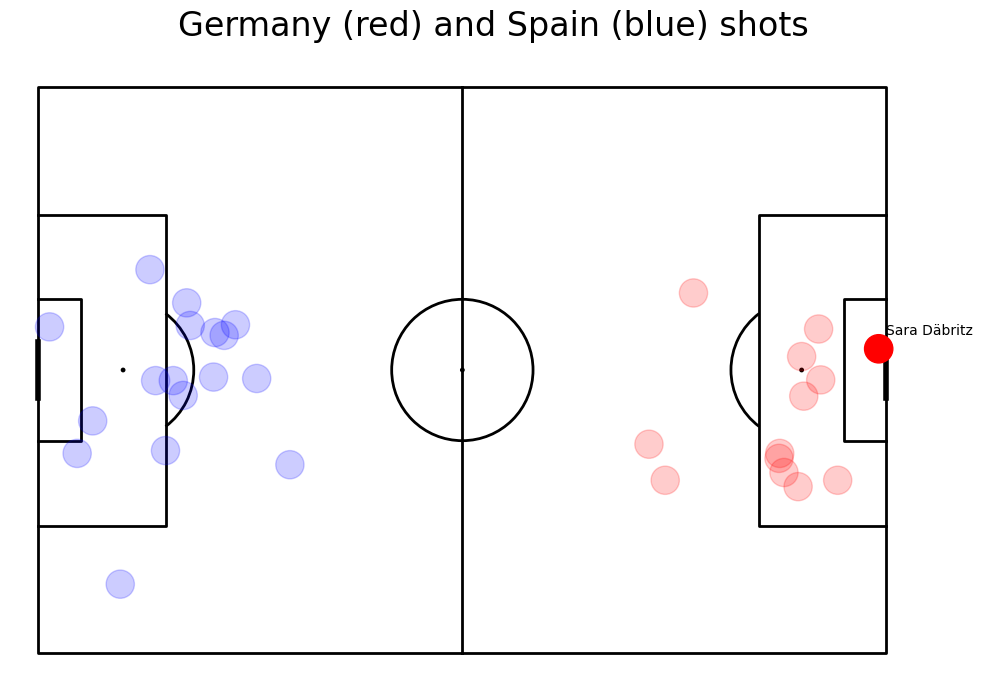

In [10]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information 
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']    
    #set circlesize
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue") 
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("Germany (red) and Spain (blue) shots", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

# plot passes

In [15]:
parser = Sbopen()
df_passes, related, freeze, tactics = parser.event(22949)
passes = df_passes.loc[df_passes['type_name'] == 'Pass'].loc[df_passes['sub_type_name'] != 'Throw-in'].set_index('id')

In [18]:
freeze.head()

,teammate,match_id,id,x,y,player_id,player_name,position_id,position_name,event_freeze_id
0,False,22949,61ba8fdd-7b2e-4967-8c3c-038cad3d44c1,100.5,50.7,10155,María Pilar León Cebrián,5,Left Center Back,1
1,False,22949,61ba8fdd-7b2e-4967-8c3c-038cad3d44c1,100.5,51.6,10202,Virginia Torrecilla Reyes,15,Left Center Midfield,2
2,False,22949,61ba8fdd-7b2e-4967-8c3c-038cad3d44c1,100.5,54.5,10143,Alexia Putellas Segura,21,Left Wing,3
3,False,22949,61ba8fdd-7b2e-4967-8c3c-038cad3d44c1,100.5,52.6,10151,Jennifer Hermoso Fuentes,10,Center Defensive Midfield,4
4,False,22949,61ba8fdd-7b2e-4967-8c3c-038cad3d44c1,100.0,46.7,10161,María Francesca Caldentey Oliver,17,Right Wing,5


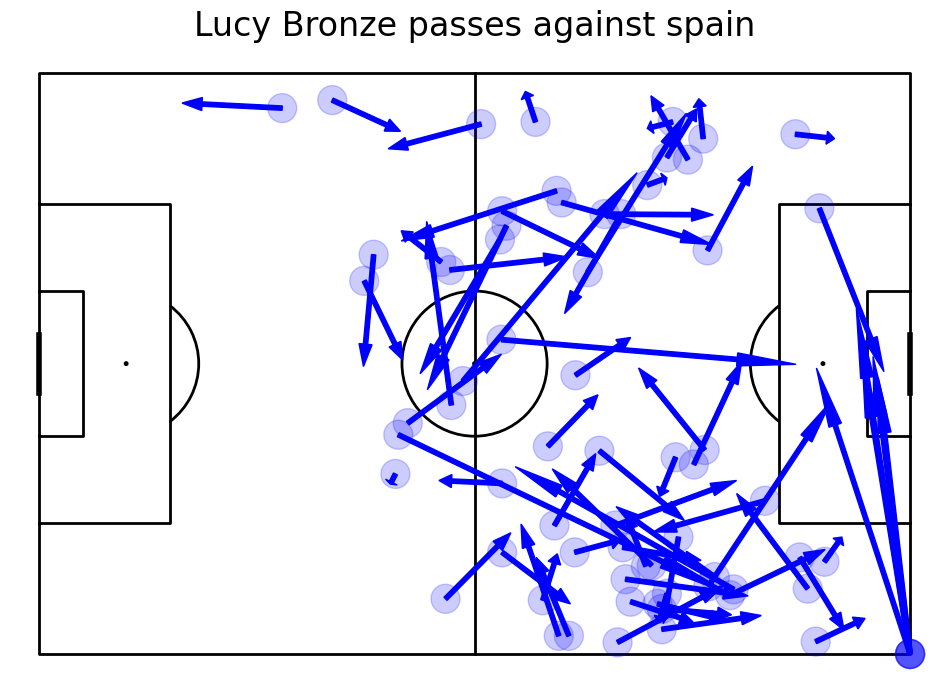

In [20]:
#drawing pitch
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))

for i,thepass in passes.iterrows():
    #if pass made by Lucy Bronze
    if thepass['player_name']=='Jennifer Hermoso Fuentes':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color="blue")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="blue")
        ax.add_patch(passArrow)

ax.set_title("Lucy Bronze passes against spain", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()